## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
import shap
from lightgbm import LGBMRegressor

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [4]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

In [138]:
df_temperatura_07=pd.read_csv('data/temp_2007.csv')
df_temperatura_08=pd.read_csv('data/temp_2008.csv')
df_temperatura_09=pd.read_csv('data/temp_2009.csv')
df_temperatura_10=pd.read_csv('data/temp_2010.csv')
df_temperatura_11=pd.read_csv('data/temp_2011.csv')
df_temperatura_12=pd.read_csv('data/temp_2012.csv')
df_temperatura_13=pd.read_csv('data/temp_2013.csv')
df_temperatura_14=pd.read_csv('data/temp_2014.csv')
df_temperatura_15=pd.read_csv('data/temp_2015.csv')
df_temperatura=pd.concat([df_temperatura_07, df_temperatura_08,df_temperatura_09,df_temperatura_10,df_temperatura_11,df_temperatura_12,df_temperatura_13,df_temperatura_14,df_temperatura_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [6]:
df.head()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
0,2013,-398345888794880068,13,28,4,4,-1687781257578748014,-320943158-171303395,10041944,1,28,1,30102013,1,13112013,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,NML,69,1,4441.45
1,2013,-3959599681650518086,13,28,3,4,166370745435838543,648485069584850511,10061937,1,28,1,19032013,1,25032013,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,NML,75,0,4550.50
2,2013,-3959599681650518086,13,28,3,4,183632305468848809,899288196-1988273609,14111923,1,28,1,15112013,1,26112013,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,NML,90,0,4441.45
3,2013,-1468647043-245326524,13,28,4,5,2877111881585847151,-961279109-1723117644,10051956,2,28,1,28042013,1,14052013,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,NML,56,0,4441.45
4,2013,946141513-1168024764,13,28,3,3,17519509571482774643,-33451060035352825,7091928,1,28,1,7022013,2,8022013,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,NML,84,0,4761.87


In [7]:
df.tail()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
140932,2014,-397825696459335749,13,28,3,4,15732651961347031435,-148801774-1928770906,7111939,2,28,1,23112013,1,7012014,1,45,491.21,E878.1,519.8,518.84,511.9,786.30,276.1,276.7,415.12,038.9,996.61,250.00,401.9,V45.82,17122013.0,37.87,33.22,99.21,87.41,88.43,88.72,90.52,90.42,87.41,89.65,91.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,0,Q,2.1374,951,0,Q,5.3027,4,4,NML,74,1,9760.5
140933,2014,-3959599681650518086,13,28,3,4,1259742565-1684660259,-12521883511529773304,9011954,2,28,1,10122013,1,10022014,4,62,486,NaN,518.81,518.0,511.9,733.13,516.36,276.2,733.00,519.8,V10.11,V15.82,437.0,V46.2,6022014.0,77.49,81.65,33.24,90.42,91.32,88.93,90.52,87.44,33.26,88.01,87.41,89.52,88.72,31.42,18.11,99.23,87.24,93.9,93.18,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,3,NML,59,1,10274.5
140934,2014,6786010821767932736,13,28,2,3,82420401566747514,4927991441436875167,7101953,1,28,1,31102014,1,18112014,1,18,486,NaN,510.9,511.89,494.1,491.21,511.9,518.81,799.02,272.4,790.6,275.49,712.30,122.8,7112014.0,34.06,34.04,34.91,87.44,89.52,87.44,89.52,88.74,88.73,99.23,99.21,93.96,93.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,4,NML,61,0,10274.5
140935,2014,-398345888794880068,13,28,4,4,-1318909344-1737054105,2075399370-1949447169,19041951,1,28,1,3032014,1,15032014,4,12,481,NaN,518.81,995.91,491.21,511.9,276.2,584.9,518.89,573.8,285.9,305.1,303.91,V12.54,NaN,34.04,34.20,88.43,87.41,90.59,87.44,89.52,93.96,89.66,99.04,89.65,88.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,3,NML,62,0,10274.5
140936,2014,6785908421717601093,13,28,4,5,-758230369-639741394,-18336156992074847197,5111946,1,28,1,29012014,1,14022014,1,16,511.81,NaN,518.81,428.0,162.5,196.1,197.2,255.10,584.9,405.99,278.00,496,427.31,276.8,10022014.0,34.92,99.25,34.20,34.91,99.23,93.94,93.96,89.65,88.72,91.39,90.59,89.52,87.44,99.19,99.29,90.49,NaN,NaN,NaN,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,4,NML,67,1,10274.5


In [8]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [9]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
año,140937.0,NaN,NaN,NaN,2011.504729,2.248531,2008.0,2010.0,2012.0,2013.0,2015.0
hospital_recodificado,140937,34,-398345888794880068,16385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comunidad_autónoma,140937.0,NaN,NaN,NaN,13.0,0.0,13.0,13.0,13.0,13.0,13.0
provincia,140937.0,NaN,NaN,NaN,28.0,0.0,28.0,28.0,28.0,28.0,28.0
grupo_hospital,140937.0,NaN,NaN,NaN,3.069386,0.963666,1.0,2.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
nivel_mortalidad,140937.0,NaN,NaN,NaN,2.166997,0.967887,0.0,1.0,2.0,3.0,4.0
servicio,140937,2,NML,139565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,140937.0,NaN,NaN,NaN,66.232373,17.506537,0.0,57.0,70.0,79.0,110.0
reingreso,140937.0,NaN,NaN,NaN,0.129136,0.335351,0.0,0.0,0.0,0.0,1.0


In [11]:
comunidad_autonoma=13
provincia=28

In [12]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [13]:
df_calidad_aire.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2007,1,12.0,V,17.0,V,27.0,V,25.0,V,23.0,V,20.0,V,15.0,V,11.0,V,15.0,V,15.0,V,26.0,V,31.0,V,29.0,V,23.0,V,20.0,V,16.0,V,11.0,V,12.0,V,20.0,V,22.0,V,20.0,V,12.0,V,15.0,V,18.0,V,15.0,V,15.0,V,15.0,V,21.0,V,19.0,V,14.0,V,21.0,V
1,28,79,4,1,28079004_1_38,2007,2,20.0,V,20.0,V,18.0,V,19.0,V,17.0,V,17.0,V,14.0,V,13.0,V,13.0,V,12.0,V,11.0,V,13.0,V,17.0,V,14.0,V,21.0,V,17.0,V,12.0,V,15.0,V,17.0,V,16.0,V,16.0,V,12.0,V,11.0,V,12.0,V,13.0,V,18.0,V,20.0,V,14.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2007,3,12.0,V,11.0,V,11.0,V,14.0,V,13.0,V,13.0,V,11.0,V,15.0,V,18.0,V,15.0,V,17.0,V,16.0,V,18.0,V,19.0,V,17.0,V,17.0,V,12.0,V,14.0,V,13.0,V,15.0,V,13.0,V,14.0,V,16.0,V,16.0,V,15.0,V,17.0,V,13.0,V,14.0,V,14.0,V,13.0,V,11.0,V
3,28,79,4,1,28079004_1_38,2007,4,10.0,V,11.0,V,13.0,V,14.0,V,11.0,V,12.0,V,11.0,V,13.0,V,14.0,V,13.0,V,12.0,V,13.0,V,13.0,V,12.0,V,10.0,V,11.0,V,11.0,V,11.0,V,11.0,V,10.0,V,10.0,V,10.0,V,10.0,V,11.0,V,10.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2007,5,8.0,V,8.0,V,9.0,V,11.0,V,10.0,V,9.0,V,11.0,V,11.0,V,10.0,V,10.0,V,9.0,V,9.0,V,8.0,V,8.0,V,9.0,V,11.0,V,9.0,V,9.0,V,9.0,V,8.0,V,8.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V,8.0,V,9.0,V,8.0,V,8.0,V


In [14]:
df_temperatura.head()

,fecha,indicativo,glo,hr,tm_min,ta_max,ts_min,nt_30,ta_min,e,nt_00,ti_max,tm_mes,tm_max,p_max,nw_55,w_racha,np_100,nw_91,np_001,w_rec,np_300,p_mes,w_med,np_010
0,2007-1,3194U,20938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-2,3194U,25655.0,67.0,4.8,20.6(16),9.4,0.0,-1.5(01),79.0,2.0,7.9,9.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-3,3194U,51782.0,54.0,3.4,21.2(18),7.7,0.0,-1.3(25),66.0,1.0,9.5,9.7,15.9,7.3(06),4.0,02/22.8(22),0.0,0.0,5.0,171.0,0.0,21.7,7.0,4.0
3,2007-4,3194U,50001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-5,3194U,67908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [16]:
df_calidad_aire.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [17]:
df_temperatura.dtypes

fecha          object
indicativo     object
glo           float64
hr            float64
tm_min        float64
ta_max         object
ts_min        float64
nt_30         float64
ta_min         object
e             float64
nt_00         float64
ti_max        float64
tm_mes        float64
tm_max        float64
p_max          object
nw_55         float64
w_racha        object
np_100        float64
nw_91         float64
np_001        float64
w_rec         float64
np_300        float64
p_mes         float64
w_med         float64
np_010        float64
dtype: object

In [18]:
df.shape

(140937, 64)

In [19]:
df_calidad_aire.shape

(13898, 69)

In [20]:
df_temperatura.shape

(108, 25)

In [21]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [22]:
df_calidad_aire.isnull().mean().sort_values(ascending=False)*100

PROVINCIA    0.0
V19          0.0
V22          0.0
D22          0.0
V21          0.0
            ... 
D12          0.0
V12          0.0
D13          0.0
V13          0.0
V31          0.0
Length: 69, dtype: float64

In [23]:
df_temperatura.isnull().mean().sort_values(ascending=False)*100

nw_91         62.037037
w_racha       62.037037
nw_55         62.037037
w_rec         60.185185
np_010        46.296296
p_mes         46.296296
np_300        46.296296
np_001        46.296296
np_100        46.296296
p_max         46.296296
hr            43.518519
tm_max        42.592593
tm_mes        42.592593
ti_max        42.592593
nt_00         42.592593
ta_min        42.592593
nt_30         42.592593
ts_min        42.592593
ta_max        42.592593
tm_min        42.592593
w_med         39.814815
e             27.777778
indicativo     0.000000
glo            0.000000
fecha          0.000000
dtype: float64

In [24]:
df.duplicated().sum()

0

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [26]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [27]:
df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']]=df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']].applymap(lambda x:vuelta_fecha(x))

In [28]:
df.servicio=LabelEncoder().fit_transform(df.servicio)

<AxesSubplot:>

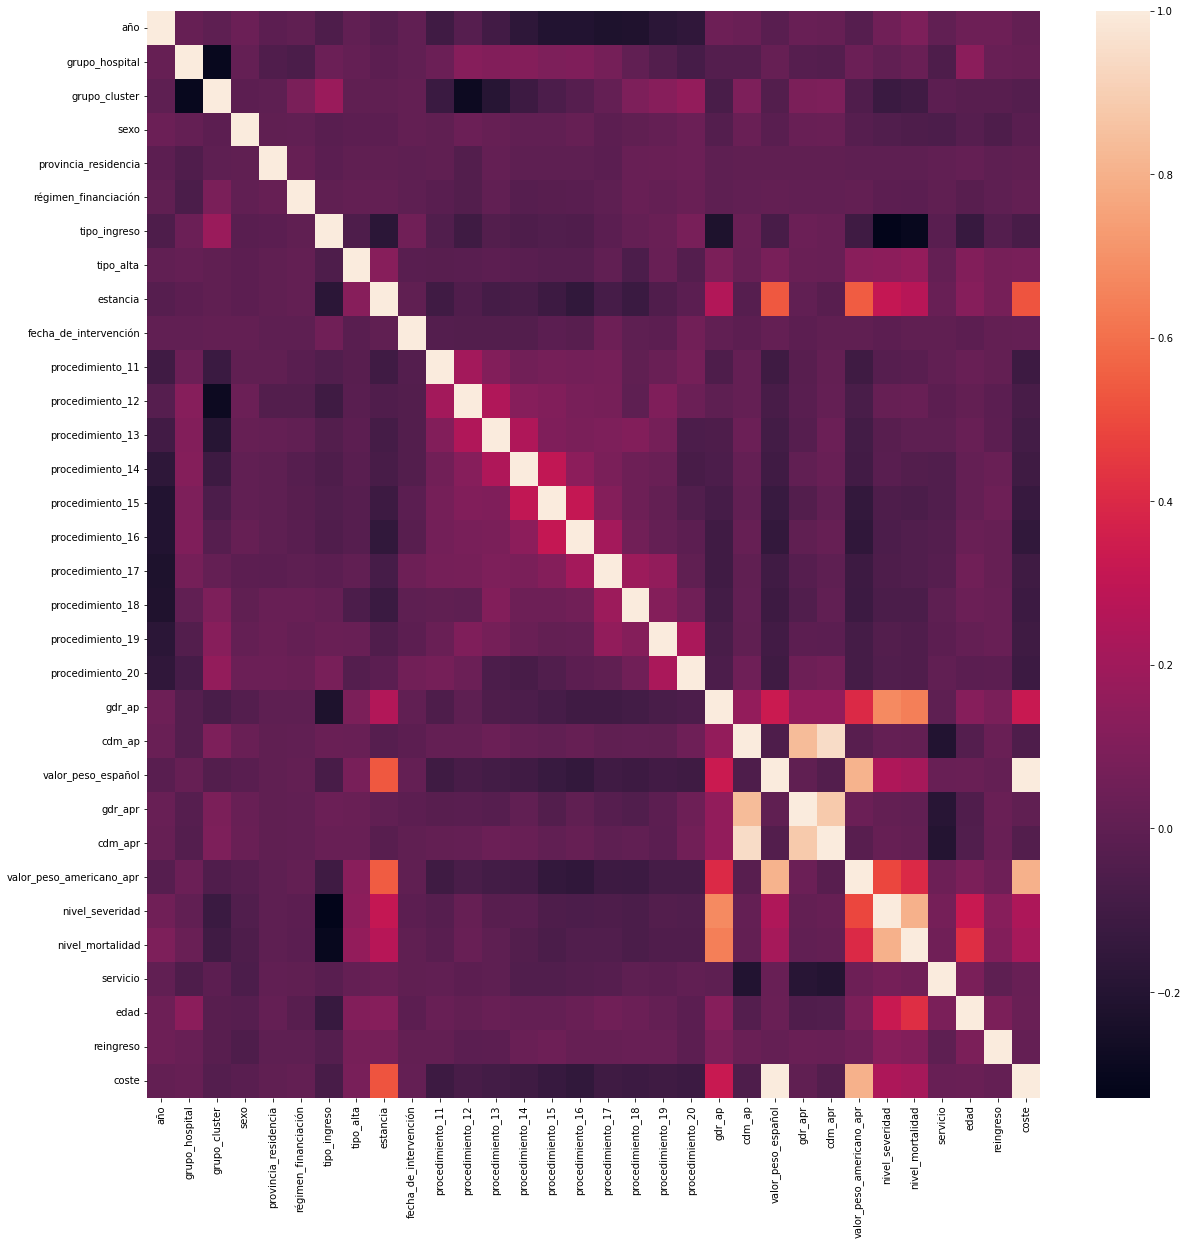

In [29]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [30]:
df.select_dtypes('number').describe()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
count,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,4.998000e+03,12341.000000,7648.000000,4976.000000,7378.000000,6064.000000,4901.000000,3990.000000,3357.000000,2780.000000,2123.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000
mean,2011.504729,3.069386,8.712382,1.385640,28.295345,1.108190,1.229322,1.148045,8.233792,1.601155e+07,89.994133,88.978576,89.173368,90.813866,90.658287,90.871745,90.641140,90.146235,90.557446,91.138337,339.322477,4.462391,0.927574,165.432335,4.482379,1.020586,2.408303,2.166997,0.990265,66.232373,0.129136,4326.082895
std,2.248531,0.963666,20.757274,0.486806,5.048316,0.773977,0.505773,0.709761,10.094767,8.673040e+06,11.674164,13.366136,12.870377,9.212901,9.544991,9.400413,9.454177,9.762235,8.079143,7.419758,240.095403,2.991342,1.166974,128.710834,2.995818,0.947053,0.891282,0.967887,0.098184,17.506537,0.335351,5533.796695
min,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012013e+06,0.120000,0.140000,0.120000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,3.000000,9.022010e+06,89.390000,88.927500,89.370000,89.170000,89.370000,89.520000,89.520000,89.370000,89.370000,89.520000,88.000000,4.000000,0.634600,136.000000,4.000000,0.607200,2.000000,1.000000,1.000000,57.000000,0.000000,3020.730000
50%,2012.000000,3.000000,4.000000,1.000000,28.000000,1.000000,1.000000,1.000000,6.000000,1.608201e+07,90.490000,90.420000,90.460000,90.410000,90.310000,90.490000,90.420000,90.410000,90.410000,90.590000,539.000000,4.000000,0.830500,140.000000,4.000000,0.905700,3.000000,2.000000,1.000000,70.000000,0.000000,4040.280000
75%,2013.000000,4.000000,5.000000,2.000000,28.000000,1.000000,1.000000,1.000000,10.000000,2.311201e+07,93.960000,93.940000,93.940000,93.960000,93.960000,93.960000,93.940000,92.180000,92.140000,93.940000,541.000000,4.000000,0.949800,141.000000,4.000000,1.047400,3.000000,3.000000,1.000000,79.000000,0.000000,4584.570000
max,2015.000000,4.000000,99.000000,3.000000,99.000000,9.000000,9.000000,9.000000,623.000000,3.112201e+07,99.840000,99.990000,99.910000,99.990000,99.840000,99.940000,99.840000,99.840000,99.840000,99.840000,901.000000,25.000000,23.036400,956.000000,25.000000,17.419400,4.000000,4.000000,1.000000,110.000000,1.000000,116051.540000


In [31]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [32]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [33]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [34]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [35]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [36]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

In [37]:
conditionlist = [
    (df['edad'] <= 12) ,
    (df['edad'] > 12) & (df['edad'] <=18),
    (df['edad'] >18) & (df['edad'] <=26),
    (df['edad'] >=27) & (df['edad'] <=59),
    (df['edad']>=60)]
choicelist = ['Niño','Adolescente', 'Joven', 'Adulto','Persona Mayor']
df['grupo_edad'] = np.select(conditionlist, choicelist, default='Not Specified')

<AxesSubplot:title={'center':'estancia'}, xlabel='[grupo_edad]'>

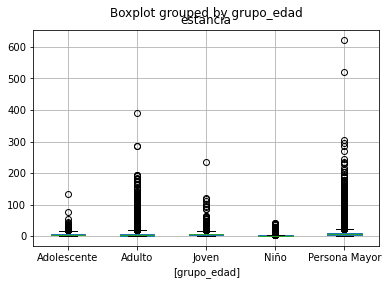

In [38]:
df[['grupo_edad','estancia']].boxplot(by='grupo_edad')

In [39]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [40]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [41]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [42]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [43]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

In [44]:
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [45]:
px.line(df.groupby('ingreso_mes_año').count().reset_index().sort_values('ingreso_mes_año'),x='ingreso_mes_año',y='fecha_de_ingreso')

In [46]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','historia_recodificada','cip_recodificado','diagnóstico_principal','diagnóstico_2','procedimiento_1','valor_peso_español','nivel_severidad','nivel_mortalidad',	'servicio','edad','reingreso']

In [47]:
len(features)

16

<AxesSubplot:title={'center':'edad'}, xlabel='[grupo_cluster]'>

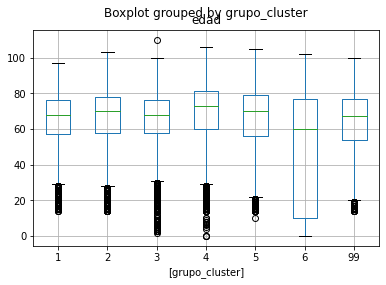

In [48]:
df[['grupo_cluster','edad']].boxplot(by='grupo_cluster')

In [49]:
df.ingreso_mes_año.value_counts()

2015-01-01    2226
2011-01-01    2134
2012-01-01    2130
2014-01-01    1887
2013-12-01    1879
              ... 
2007-12-01     549
2007-11-01      19
2007-10-01       3
2007-09-01       3
2007-08-01       2
Name: ingreso_mes_año, Length: 101, dtype: int64

In [50]:
df[features].head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso
0,4,1,2013-10-30,1,14,-1687781257578748014,-320943158-171303395,428.0,NaN,39.96,0.9181,3,2,1,69,1
1,4,1,2013-03-19,1,6,166370745435838543,648485069584850511,491.21,NaN,90.42,0.9407,3,3,1,75,0
2,4,1,2013-11-15,1,11,183632305468848809,899288196-1988273609,428.0,NaN,90.42,0.9181,4,4,1,90,0
3,5,2,2013-04-28,1,16,2877111881585847151,-961279109-1723117644,428.1,NaN,88.72,0.9181,3,4,1,56,0
4,3,1,2013-02-07,2,1,17519509571482774643,-33451060035352825,162.5,NaN,33.26,0.9844,2,2,1,84,0


In [51]:
df=df[features]

<AxesSubplot:>

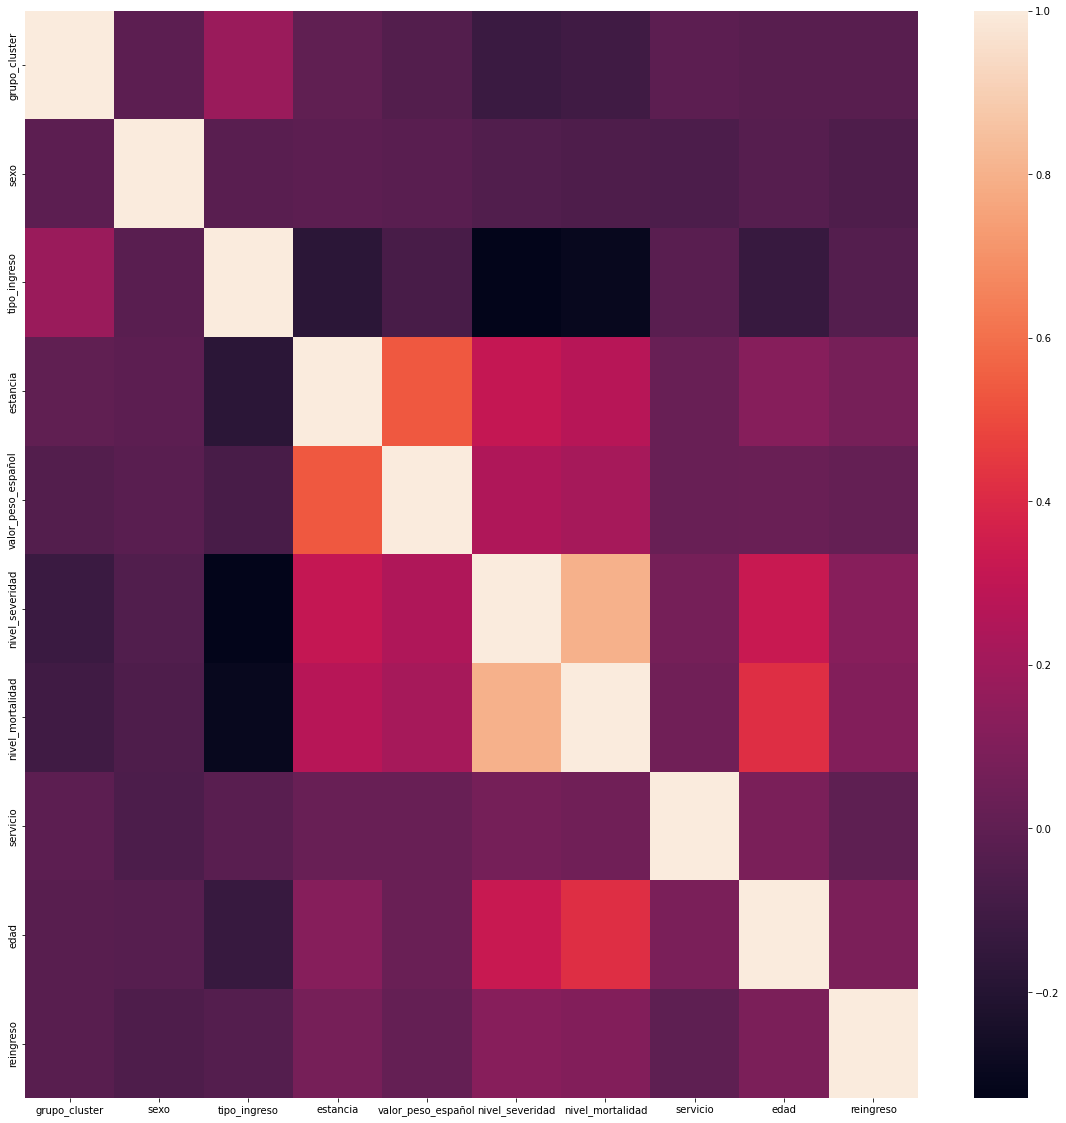

In [52]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [53]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [54]:
df_d = df_calidad_aire[Ds]

In [55]:
df_d.fillna(0,inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/1522000805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
df_calidad_aire['value'] = df_d.mean(axis=1)

In [58]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','value']]

In [59]:
df_calidad_aire['fecha'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/2462284980.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df_calidad_aire['fecha'] = pd.to_datetime(df_calidad_aire['fecha'])

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/1430271777.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','fecha']).mean().reset_index()

In [62]:
px.line(df_magnitud,x='fecha',y='value',color='MAGNITUD')

In [63]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas menor 2.5 μm', 10:'Partículas menor 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [64]:
def set_values(row, value):
    return value[row]

In [65]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [66]:
px.line(df_magnitud.reset_index(),x='fecha',y='value',color='MAGNITUD_NOMBRE')

In [67]:
df_umbrales = pd.read_excel('data/Umbrales.xlsx')

In [68]:
df_fin = df_magnitud.merge(df_umbrales, left_on='MAGNITUD',right_on='CODIGO', how='inner')

In [69]:
particulas=['Dióxido de Azufre','Monóxido de Carbono','Dióxido de Nitrógeno','Partículas menor 2,5 μm','Partículas menor 10 μm','Óxidos de Nitrógeno','Ozono','Benceno']

In [70]:
df_fin.drop(['CODIGO','MAGNITUD_y'],axis=1,inplace=True)

In [71]:
df_fin.columns = ['CODIGO','fecha','ANO','MES', 'value', 'PARTICULA', 'ABREVIATURA','MEDIDA','LIMITE', 'COMENTARIO']

In [72]:
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = np.nan
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8)].value.mean()

In [73]:
df_fin.sample(20)

,CODIGO,fecha,ANO,MES,value,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
100,1,2015-05-01,2015.0,5.0,5.206452,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
905,30,2010-06-01,2010.0,6.0,0.506452,Benceno,BEN,μg/m 3,5,Media anual
804,14,2011-01-01,2011.0,1.0,21.313364,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
543,10,2011-08-01,2011.0,8.0,23.384409,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
471,10,2008-08-01,2008.0,8.0,29.096774,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
575,10,2012-12-01,2012.0,12.0,15.763441,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
788,14,2009-09-01,2009.0,9.0,60.294931,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
317,8,2015-06-01,2015.0,6.0,29.750000,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
421,9,2015-02-01,2015.0,2.0,7.096774,Partículas menor 2.5 μm,PM2.5,μg/m 3,25,Media anual
800,14,2010-09-01,2010.0,9.0,44.300248,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...


In [74]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

In [139]:
df_temperatura=df_temperatura[['fecha','tm_mes','hr','p_max','p_mes']]

In [140]:
df_temperatura.p_max=df_temperatura.p_max.str.slice(0,3).astype('float')

In [165]:
df_temperatura.fecha=pd.to_datetime(df_temperatura.fecha)

In [145]:
df_temperatura.tm_mes.interpolate(method="akima",inplace=True)
df_temperatura.hr.interpolate(method="akima",inplace=True)
df_temperatura.p_max.interpolate(method="akima",inplace=True)
df_temperatura.p_mes.interpolate(method="akima",inplace=True)

In [146]:
px.line(df_temperatura,x='fecha',y=['p_max','hr','p_mes','tm_mes'])

In [148]:
df_temperatura.rename(columns={'tm_mes':'temperatura_media_mes','hr':'humedad_relativa','p_max':'precipitaciones','p_mes':'presion_atmosferica_mes'},inplace=True)

## Diagnósticos

In [79]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

enfermedad_renal = [
    '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [80]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [81]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    ~((df['diagnóstico_2'].isin(enfermedad_renal)) & (df['procedimiento_1'].isin(dialisis)) )
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [82]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [83]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'enfermedad renal': enfermedad_renal,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

,diagnóstico_principal,diagnosis_name
0,428.0,insuficiencia cardiaca congestiva
1,491.21,enfermedad pulmonar obstructiva cronica
2,428.0,insuficiencia cardiaca congestiva
3,428.1,insuficiencia cardiaca congestiva
4,162.5,NaN


In [155]:
diagnosticos=list(diagnosis_dict.keys())
diagnosticos.append('fecha')
del diagnosticos[8]

In [85]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [86]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [87]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [88]:
df=df.sort_values('fecha_de_ingreso')
df.head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,historia_recodificada,cip_recodificado,diagnóstico_principal,diagnóstico_2,procedimiento_1,valor_peso_español,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,año_ingreso,mes_ingreso,dia_ingreso,admission_date,diagnosis_name,disease_name
16583,6,1,2007-08-02,2,166,-529045945-1318899342,00,011.93,292.9,87.44,2.015,2,1,1,37,0,2007,8,2,2007-08-02,NaN,NaN
12521,5,2,2007-08-20,2,193,-1710416977-1689576786,00,150.5,038.9,31.1,16.498,4,4,1,73,0,2007,8,20,2007-08-20,NaN,NaN
28366,4,1,2007-09-20,1,112,679077701190970178,00,394.0,041.19,31.1,16.498,4,4,1,76,0,2007,9,20,2007-09-20,NaN,NaN
47906,5,1,2007-09-20,1,127,15168214271531108233,00,860.0,038.9,00.17,16.498,4,4,1,79,0,2007,9,20,2007-09-20,NaN,NaN
60137,3,2,2007-09-29,1,109,1698874227-411547317,00,518.81,246.8,31.1,11.517,3,4,1,73,0,2007,9,29,2007-09-29,NaN,NaN


In [89]:
df_num_ingresos_diagnostico=df.groupby(['año_ingreso','mes_ingreso','diagnosis_name'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [208]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [209]:
df_num_ingresos['fecha']=df_num_ingresos.año_ingreso.astype('str')+'-'+df_num_ingresos.mes_ingreso.astype('str')

In [210]:
df_num_ingresos.fecha=pd.to_datetime(df_num_ingresos.fecha,format='%Y-%m')

In [211]:
df_num_ingresos=df_num_ingresos[['fecha','numero_de_ingresos']]

In [212]:
df_num_ingresos.numero_de_ingresos=df_num_ingresos.numero_de_ingresos.shift(-1)

In [213]:
df_num_ingresos.dropna(inplace=True)

In [214]:
df_num_ingresos

,fecha,numero_de_ingresos
0,2007-08-01,3.0
1,2007-09-01,3.0
2,2007-10-01,19.0
3,2007-11-01,549.0
4,2007-12-01,1620.0
...,...,...
95,2015-07-01,810.0
96,2015-08-01,1109.0
97,2015-09-01,1384.0
98,2015-10-01,1427.0


In [97]:
df_num_ingresos_diagnostico['mes_ano']=df_num_ingresos_diagnostico.año_ingreso.astype('str')+'-'+df_num_ingresos_diagnostico.mes_ingreso.astype('str')

In [98]:
df_num_ingresos_diagnostico.mes_ano=pd.to_datetime(df_num_ingresos_diagnostico.mes_ano,format='%Y-%m')

In [99]:
df_num_ingresos_diagnostico_pivot=df_num_ingresos_diagnostico.pivot('mes_ano','diagnosis_name','numero_de_ingresos').reset_index()

In [100]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [215]:
df_merge=df_num_ingresos.merge(df_fin,on=['fecha'],how='inner')

In [216]:
df_merge.sample(20)

,fecha,numero_de_ingresos,CODIGO,ANO,MES,value,PARTICULA,ABREVIATURA,MEDIDA,LIMITE,COMENTARIO
188,2009-04-01,1475.0,30,2009.0,4.0,0.370968,Benceno,BEN,μg/m 3,5,Media anual
23,2007-10-01,19.0,10,2007.0,10.0,26.752688,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
799,2014-12-01,2226.0,14,2014.0,12.0,21.509217,Ozono,O3,μg/m 3,120,Máxima diaria de las medias móviles octohorari...
90,2008-06-01,1089.0,1,2008.0,6.0,6.854839,Dióxido de Azufre,SO3,μg/m 4,500,Alerta. Media horaria durante 3 horas consecut...
434,2011-08-01,1205.0,8,2011.0,8.0,33.827957,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
884,2015-10-01,1427.0,8,2015.0,10.0,42.154570,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
335,2010-09-01,1690.0,8,2010.0,9.0,46.471248,Dióxido de Nitrógeno,NO3,μg/m 4,400,"Alerta. Media horaria, durante 3 horas consecu..."
464,2011-11-01,1778.0,10,2011.0,11.0,19.225806,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...
264,2010-01-01,1406.0,9,2010.0,1.0,10.096774,Partículas menor 2.5 μm,PM2.5,μg/m 3,25,Media anual
86,2008-05-01,1373.0,10,2008.0,5.0,21.553763,Partículas menor 10 μm,PM10,μg/m 3,50,Media diaria. No podrá superarse en más de 35 ...


In [103]:
px.line(df_merge,x='fecha',y=['value','LIMITE'],color='PARTICULA')

In [217]:
df_merge.drop(['COMENTARIO','ABREVIATURA','MEDIDA','ANO','MES'],axis=1,inplace=True)

In [218]:
df_merge.head(10)

,fecha,numero_de_ingresos,CODIGO,value,PARTICULA,LIMITE
0,2007-08-01,3.0,1,6.366935,Dióxido de Azufre,500
1,2007-08-01,3.0,6,0.234677,Monóxido de Carbono,10
2,2007-08-01,3.0,8,30.892473,Dióxido de Nitrógeno,400
3,2007-08-01,3.0,9,14.887097,Partículas menor 2.5 μm,25
4,2007-08-01,3.0,10,34.865591,Partículas menor 10 μm,40
5,2007-08-01,3.0,10,34.865591,Partículas menor 10 μm,50
6,2007-08-01,3.0,12,46.169355,Óxidos de Nitrógeno,30
7,2007-08-01,3.0,14,59.720430,Ozono,120
8,2007-08-01,3.0,30,0.375806,Benceno,5
9,2007-09-01,3.0,1,5.955645,Dióxido de Azufre,500


In [222]:
df_def=pd.pivot_table(df_merge,index='fecha',columns='PARTICULA',values='value').reset_index().merge(df_num_ingresos,on='fecha',how='left').merge(df_temperatura,on='fecha',how='left')

In [168]:
df_def[diagnosticos[:-1]]=df_def[diagnosticos[:-1]].shift(-1)

In [223]:
df_def['Benceno_1_mes']=df_def.Benceno.shift()
df_def['Benceno_2_meses']=df_def.Benceno.shift(2)
df_def['Benceno_3_meses']=df_def.Benceno.shift(3)
df_def['DióxidodDeAzufre_1_mes']=df_def['Dióxido de Azufre'].shift()
df_def['DióxidodDeAzufre_2_meses']=df_def['Dióxido de Azufre'].shift(2)
df_def['DióxidodDeAzufre_3_meses']=df_def['Dióxido de Azufre'].shift(3)
df_def['Ozono_1_mes']=df_def.Ozono.shift()
df_def['Ozono_2_meses']=df_def.Ozono.shift(2)
df_def['Ozono_3_meses']=df_def.Ozono.shift(3)
df_def['DióxidodDeNitrogeno_1_mes']=df_def['Dióxido de Nitrógeno'].shift()
df_def['DióxidodDeNitrogeno_2_meses']=df_def['Dióxido de Nitrógeno'].shift(2)
df_def['DióxidodDeNitrogeno_3_meses']=df_def['Dióxido de Nitrógeno'].shift(3)
df_def['MonoxidoDeCarbono_1_mes']=df_def['Monóxido de Carbono'].shift()
df_def['MonoxidoDeCarbono_2_meses']=df_def['Monóxido de Carbono'].shift(2)
df_def['MonoxidoDeCarbono_3_meses']=df_def['Monóxido de Carbono'].shift(3)
df_def['OxidosDeNitrogeno_1_mes']=df_def['Óxidos de Nitrógeno'].shift()
df_def['OxidosDeNitrogeno_2_meses']=df_def['Óxidos de Nitrógeno'].shift(2)
df_def['OxidosDeNitrogeno_3_meses']=df_def['Óxidos de Nitrógeno'].shift(3)
df_def['Particulas10_1_mes']=df_def['Partículas menor 10 μm'].shift()
df_def['Particulas10_2_meses']=df_def['Partículas menor 10 μm'].shift(2)
df_def['Particulas10_3_meses']=df_def['Partículas menor 10 μm'].shift(3)
df_def['Particulas2.5_1_mes']=df_def['Partículas menor 2.5 μm'].shift()
df_def['Particulas2.5_2_meses']=df_def['Partículas menor 2.5 μm'].shift(2)
df_def['Particulas2.5_3_meses']=df_def['Partículas menor 2.5 μm'].shift(3)

In [226]:
df_def=pd.read_csv('data/df_definitivo.csv')
df_def_diagnosticos=pd.read_csv('data/df_definitivo_por_diagnosticos.csv')

## Modelos por número de ingresos totales

## XGBoost

In [227]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa']
columns_y='numero_de_ingresos'


X_train,X_test,y_train,y_test=train_test_split(df_def[ (~df_def[columns_y].isna())][columns_X],df_def[ (~df_def[columns_y].isna())][columns_y],test_size=0.2,random_state=42)

In [228]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [229]:
model1=XGBRegressor(random_state=42)

In [230]:
cv = RandomizedSearchCV(model1, param_grid, cv = 4, verbose = True, n_jobs = -1)

In [231]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [232]:
cv.best_score_

0.15249703719765337

In [233]:
cv.best_params_

{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1}

In [234]:
final_model_xgb = XGBRegressor(**cv.best_params_)
final_model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [235]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

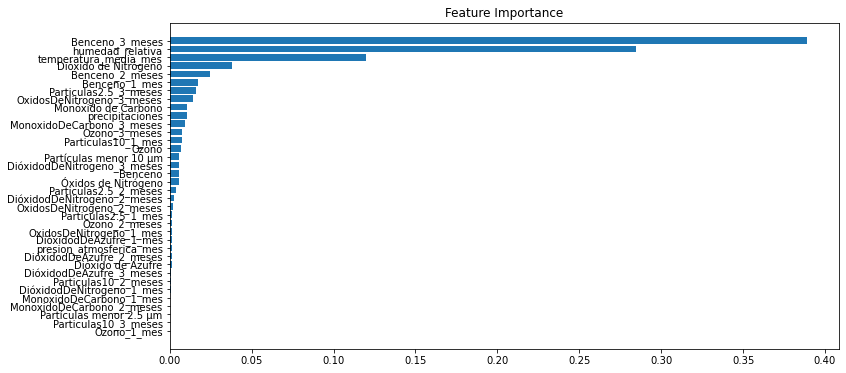

In [236]:
feature_importance = final_model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [237]:
preds1=final_model_xgb.predict(X_test)

In [238]:
rmse_xgb, mae_xgb,mape_xgb=np.sqrt(mean_squared_error(preds1,y_test)),mean_absolute_error(preds1,y_test),mean_absolute_percentage_error(preds1,y_test)

In [239]:
errores_xgb=[ mae_xgb,mape_xgb,rmse_xgb]

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



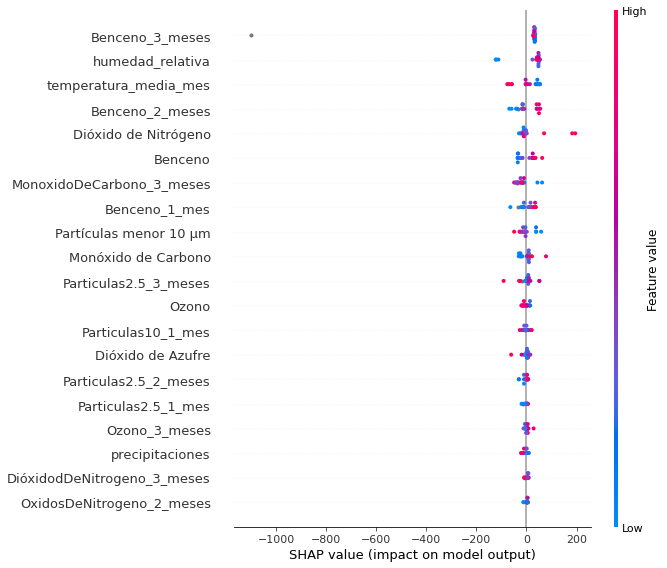

In [240]:
explainer = shap.TreeExplainer(final_model_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [241]:
df_num_ingresos['predicciones_xgb']=final_model_xgb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [242]:
pd.concat([X_train,X_test]).sort_index()

,Benceno,Dióxido de Azufre,Dióxido de Nitrógeno,Monóxido de Carbono,Ozono,Partículas menor 10 μm,Partículas menor 2.5 μm,Óxidos de Nitrógeno,Benceno_1_mes,Benceno_2_meses,Benceno_3_meses,DióxidodDeAzufre_1_mes,DióxidodDeAzufre_2_meses,DióxidodDeAzufre_3_meses,Ozono_1_mes,Ozono_2_meses,Ozono_3_meses,DióxidodDeNitrogeno_1_mes,DióxidodDeNitrogeno_2_meses,DióxidodDeNitrogeno_3_meses,MonoxidoDeCarbono_1_mes,MonoxidoDeCarbono_2_meses,MonoxidoDeCarbono_3_meses,OxidosDeNitrogeno_1_mes,OxidosDeNitrogeno_2_meses,OxidosDeNitrogeno_3_meses,Particulas10_1_mes,Particulas10_2_meses,Particulas10_3_meses,Particulas2.5_1_mes,Particulas2.5_2_meses,Particulas2.5_3_meses,temperatura_media_mes,precipitaciones,presion_atmosferica_mes,humedad_relativa
0,0.375806,6.366935,30.892473,0.234677,59.720430,34.865591,14.887097,46.169355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.790547,11.000000,20.400000,47.752179
1,0.475806,5.955645,42.860215,0.295565,44.430108,32.129032,14.854839,69.545699,0.375806,NaN,NaN,6.366935,NaN,NaN,59.720430,NaN,NaN,30.892473,NaN,NaN,0.234677,NaN,NaN,46.169355,NaN,NaN,34.865591,NaN,NaN,14.887097,NaN,NaN,21.800000,3.700000,5.700000,49.000000
2,0.640323,7.802419,53.387097,0.389113,27.263441,26.752688,15.306452,102.561828,0.475806,0.375806,NaN,5.955645,6.366935,NaN,44.430108,59.720430,NaN,42.860215,30.892473,NaN,0.295565,0.234677,NaN,69.545699,46.169355,NaN,32.129032,34.865591,NaN,14.854839,14.887097,NaN,15.200000,16.000000,30.800000,57.000000
3,1.193548,16.778226,68.491935,0.593145,15.510753,34.978495,17.645161,179.212366,0.640323,0.475806,0.375806,7.802419,5.955645,6.366935,27.263441,44.430108,59.720430,53.387097,42.860215,30.892473,0.389113,0.295565,0.234677,102.561828,69.545699,46.169355,26.752688,32.129032,34.865591,15.306452,14.854839,14.887097,8.800000,27.000000,44.200000,56.000000
4,1.085484,20.241935,65.532258,0.654435,13.053763,31.908602,19.467742,189.701613,1.193548,0.640323,0.475806,16.778226,7.802419,5.955645,15.510753,27.263441,44.430108,68.491935,53.387097,42.860215,0.593145,0.389113,0.295565,179.212366,102.561828,69.545699,34.978495,26.752688,32.129032,17.645161,15.306452,14.854839,4.305392,31.173555,54.851100,56.425057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.597849,4.954839,33.353495,0.250323,77.665899,26.905914,10.715054,44.685484,0.410215,0.409140,0.437097,5.093548,5.206452,4.990323,79.642857,70.417051,61.640553,29.750000,28.450269,28.061828,0.241290,0.261935,0.276774,39.180108,41.236559,40.692204,20.782258,20.887097,17.478495,9.919355,8.747312,8.252688,29.000000,7.880086,22.034989,31.000000
96,0.412903,5.603226,26.276882,0.241290,69.262673,25.833333,10.290323,36.643817,0.597849,0.410215,0.409140,4.954839,5.093548,5.206452,77.665899,79.642857,70.417051,33.353495,29.750000,28.450269,0.250323,0.241290,0.261935,44.685484,39.180108,41.236559,26.905914,20.782258,20.887097,10.715054,9.919355,8.747312,25.300000,6.400000,16.100000,38.000000
97,0.498925,5.948387,34.548387,0.272258,54.608295,15.803763,7.865591,52.690860,0.412903,0.597849,0.410215,5.603226,4.954839,5.093548,69.262673,77.665899,79.642857,26.276882,33.353495,29.750000,0.241290,0.250323,0.241290,36.643817,44.685484,39.180108,25.833333,26.905914,20.782258,10.290323,10.715054,9.919355,19.900000,3.300000,3.900000,41.000000
98,0.875269,6.670968,42.154570,0.355161,32.099078,69.747312,10.510753,81.142473,0.498925,0.412903,0.597849,5.948387,5.603226,4.954839,54.608295,69.262673,77.665899,34.548387,26.276882,33.353495,0.272258,0.241290,0.250323,52.690860,36.643817,44.685484,15.803763,25.833333,26.905914,7.865591,10.290323,10.715054,15.200000,5.249203,7.913601,57.000000


## CatBoost

In [243]:
model2=CatBoostRegressor()

In [244]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [245]:
cv = RandomizedSearchCV(model2, param_grid, cv = 4, verbose = True, n_jobs = -1)

In [246]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan  0.34410619  0.20231921 -0.08396659         nan -0.04951564
  0.11611597         nan -0.04696625  0.16552109]



0:	learn: 358.2335161	total: 66.9ms	remaining: 13.3s
1:	learn: 348.0555779	total: 125ms	remaining: 12.4s
2:	learn: 338.1710177	total: 326ms	remaining: 21.4s
3:	learn: 324.6715026	total: 365ms	remaining: 17.9s
4:	learn: 313.9556224	total: 451ms	remaining: 17.6s
5:	learn: 305.0300926	total: 517ms	remaining: 16.7s
6:	learn: 293.6671074	total: 583ms	remaining: 16.1s
7:	learn: 284.3951981	total: 667ms	remaining: 16s
8:	learn: 275.2534940	total: 778ms	remaining: 16.5s
9:	learn: 267.4990953	total: 844ms	remaining: 16s
10:	learn: 260.0401604	total: 925ms	remaining: 15.9s
11:	learn: 253.0262761	total: 931ms	remaining: 14.6s
12:	learn: 243.5833315	total: 977ms	remaining: 14s
13:	learn: 234.6479615	total: 990ms	remaining: 13.2s
14:	learn: 227.4858889	total: 1s	remaining: 12.3s
15:	learn: 222.0015629	total: 1.07s	remaining: 12.4s
16:	learn: 214.4180387	total: 1.14s	remaining: 12.3s
17:	learn: 208.8189674	total: 1.29s	remaining: 13.1s
18:	learn: 203.7604410	total: 1.42s	remaining: 13.5s
19:	learn: 

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000025E859E0760>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]},
                   verbose=True)

In [247]:
cv.best_score_

0.3441061891678311

In [248]:
cv.best_params_

{'learning_rate': 0.1, 'iterations': 200, 'depth': 10}

In [249]:
final_model_cb=CatBoostRegressor(**cv.best_params_)
final_model_cb.fit(X_train,y_train)

0:	learn: 358.2335161	total: 9.03ms	remaining: 1.8s
1:	learn: 348.0555779	total: 166ms	remaining: 16.4s
2:	learn: 338.1710177	total: 249ms	remaining: 16.3s
3:	learn: 324.6715026	total: 267ms	remaining: 13.1s
4:	learn: 313.9556224	total: 332ms	remaining: 13s
5:	learn: 305.0300926	total: 395ms	remaining: 12.8s
6:	learn: 293.6671074	total: 525ms	remaining: 14.5s
7:	learn: 284.3951981	total: 642ms	remaining: 15.4s
8:	learn: 275.2534940	total: 680ms	remaining: 14.4s
9:	learn: 267.4990953	total: 772ms	remaining: 14.7s
10:	learn: 260.0401604	total: 879ms	remaining: 15.1s
11:	learn: 253.0262761	total: 888ms	remaining: 13.9s
12:	learn: 243.5833315	total: 971ms	remaining: 14s
13:	learn: 234.6479615	total: 987ms	remaining: 13.1s
14:	learn: 227.4858889	total: 1s	remaining: 12.4s
15:	learn: 222.0015629	total: 1.13s	remaining: 13s
16:	learn: 214.4180387	total: 1.25s	remaining: 13.4s
17:	learn: 208.8189674	total: 1.31s	remaining: 13.2s
18:	learn: 203.7604410	total: 1.4s	remaining: 13.4s
19:	learn: 19

Text(0.5, 1.0, 'Feature Importance')

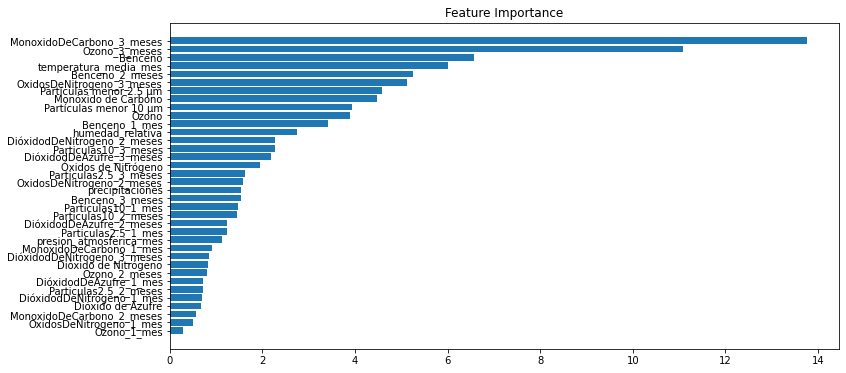

In [250]:
feature_importance = final_model_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [251]:
pred2=final_model_cb.predict(X_test)

In [252]:
mae_cb,mape_cb,rmse_cb=mean_absolute_error(pred2,y_test),mean_absolute_percentage_error(pred2,y_test),np.sqrt(mean_squared_error(pred2,y_test))

In [253]:
errores_cb=[mae_cb,mape_cb,rmse_cb]

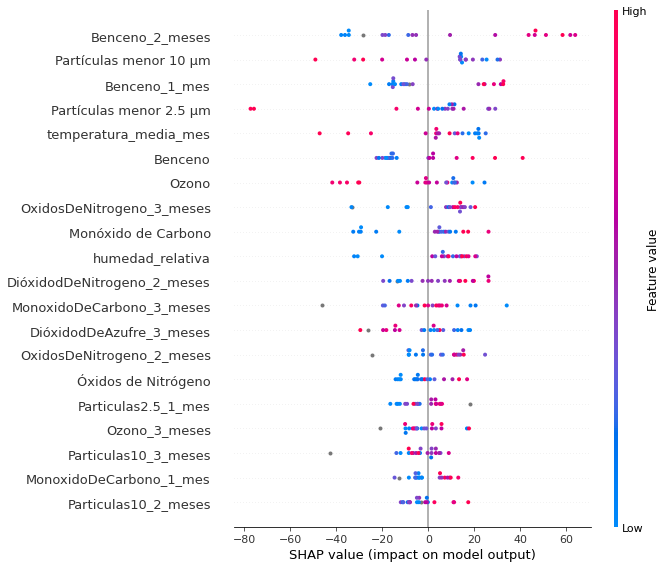

In [254]:
explainer = shap.TreeExplainer(final_model_cb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [255]:
df_num_ingresos['predicciones_cb']=final_model_cb.predict(pd.concat([X_train,X_test]).sort_index())

## LightGBM

In [256]:
model3=LGBMRegressor()

In [257]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [258]:
cv=RandomizedSearchCV(model3,param_grid,cv=4,n_jobs=-1)

In [259]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [260]:
cv.best_params_

{'num_iterations': 100, 'max_depth': 10, 'learning_rate': 0.1}

In [261]:
cv.best_score_

0.24228700971273537

In [262]:
final_model_lgb=LGBMRegressor(**cv.best_params_)
final_model_lgb.fit(X_train,y_train)

LGBMRegressor(max_depth=10, num_iterations=100)

Text(0.5, 1.0, 'Feature Importance')

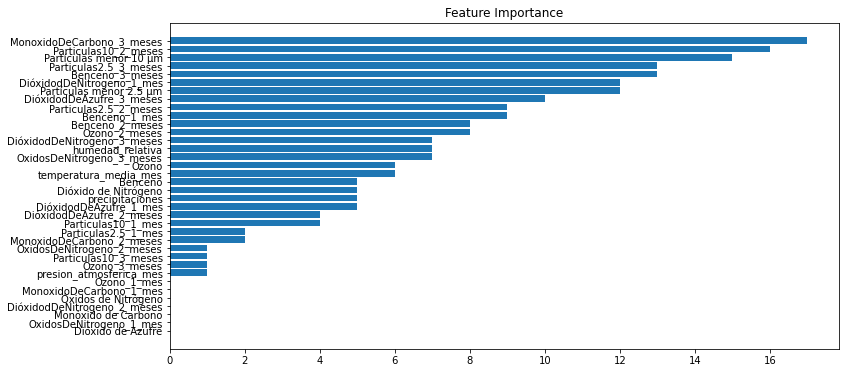

In [263]:
feature_importance = final_model_lgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [264]:
pred3=final_model_lgb.predict(X_test)

In [265]:
mae_lgb,mape_lgb,rmse_lgb=mean_absolute_error(pred3,y_test),mean_absolute_percentage_error(pred3,y_test),np.sqrt(mean_squared_error(pred3,y_test))

In [266]:
errores_lgb=[mae_lgb,mape_lgb,rmse_lgb]

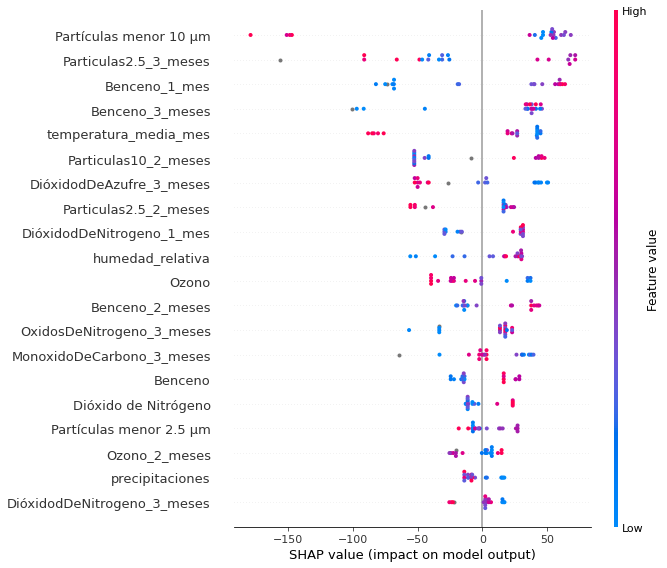

In [267]:
explainer = shap.TreeExplainer(final_model_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [268]:
df_errores=pd.DataFrame({'errores_xgb':errores_xgb,'errores_cb':errores_cb,'errores_lgb':errores_lgb},index=['MAE','MAPE','RMSE'])

In [269]:
df_errores

,errores_xgb,errores_cb,errores_lgb
MAE,106.345041,163.080311,145.273159
MAPE,0.100222,0.127252,0.133780
RMSE,122.289927,279.833131,201.590211


In [270]:
df_num_ingresos['predicciones_lgbm']=final_model_lgb.predict(pd.concat([X_train,X_test]).sort_index())

In [271]:
px.line(df_num_ingresos,x='fecha',y=['predicciones_lgbm','predicciones_cb','predicciones_xgb','numero_de_ingresos'])

## Estimación por diagnosticos: Enfermedad pulmonar obstructiva crónica (epoc), asma (a) y neumonia bacteriana (nb)

## XGBoost para enfermedad pulmonar obstructiva cronica

In [272]:
columns_y='enfermedad pulmonar obstructiva cronica'


X_train,X_test,y_train,y_test=train_test_split(df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_X],df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_y],test_size=0.2,random_state=42)

In [274]:
df_num_ingresos_epoc=df_def_diagnosticos[['fecha','enfermedad pulmonar obstructiva cronica']]

In [275]:
df_num_ingresos_epoc.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/2224907365.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [276]:
model1=XGBRegressor(random_state=42, min_sample_split = 20)

In [277]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [278]:
cv=RandomizedSearchCV(model3,param_grid,cv=4,n_jobs=-1)

In [279]:
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 100, 200]})

In [280]:
cv.best_params_,cv.best_score_

({'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1},
 0.4683252459259002)

In [281]:
final_model_xgb_epoc=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_epoc.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[19:45:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

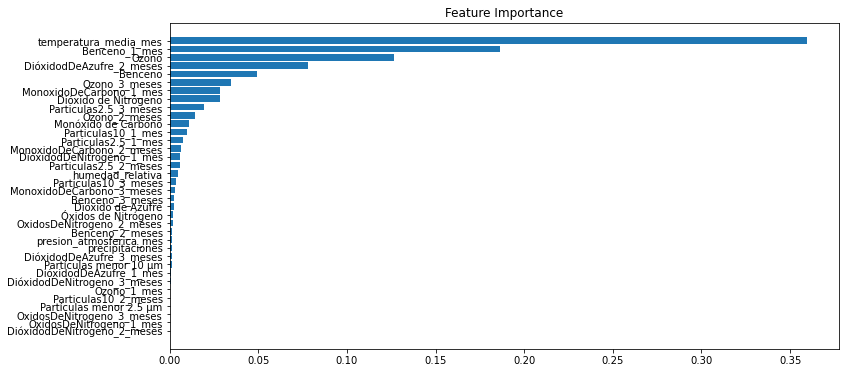

In [282]:
feature_importance = final_model_xgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [283]:
pred1_epoc=final_model_xgb_epoc.predict(X_test)

In [284]:
mae_xgb_epoc,mape_xgb_epoc,rmse_xgb_epoc=mean_absolute_error(pred1_epoc,y_test),mean_absolute_percentage_error(pred1_epoc,y_test),np.sqrt(mean_squared_error(pred1_epoc,y_test))

In [285]:
errores_xgb_epoc=[mae_xgb_epoc,mape_xgb_epoc,rmse_xgb_epoc]

In [286]:
df_num_ingresos_epoc['predicciones_xgb']=final_model_xgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/4194797343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para enfermedad pulmonar obstructiva cronica

In [287]:
model2=CatBoostRegressor()

In [288]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [289]:
cv=RandomizedSearchCV(model2,param_grid,cv=4,n_jobs=-1)

In [290]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan         nan         nan -0.03873414  0.59103667 -0.01445872
         nan         nan -0.04234248  0.21757884]



0:	learn: 98.6548219	total: 51.2ms	remaining: 5.07s
1:	learn: 95.0422332	total: 101ms	remaining: 4.93s
2:	learn: 92.2099777	total: 147ms	remaining: 4.77s
3:	learn: 88.4281612	total: 166ms	remaining: 3.99s
4:	learn: 85.7665946	total: 215ms	remaining: 4.08s
5:	learn: 82.6077059	total: 267ms	remaining: 4.18s
6:	learn: 78.6896997	total: 280ms	remaining: 3.72s
7:	learn: 76.2058466	total: 328ms	remaining: 3.77s
8:	learn: 73.7754307	total: 369ms	remaining: 3.73s
9:	learn: 71.8256566	total: 418ms	remaining: 3.76s
10:	learn: 69.4421374	total: 519ms	remaining: 4.2s
11:	learn: 67.2191586	total: 575ms	remaining: 4.22s
12:	learn: 64.8147220	total: 638ms	remaining: 4.27s
13:	learn: 61.9470062	total: 648ms	remaining: 3.98s
14:	learn: 59.8453769	total: 709ms	remaining: 4.01s
15:	learn: 57.6617480	total: 764ms	remaining: 4.01s
16:	learn: 56.0293711	total: 823ms	remaining: 4.02s
17:	learn: 54.2463734	total: 896ms	remaining: 4.08s
18:	learn: 52.4205302	total: 1.02s	remaining: 4.36s
19:	learn: 50.4401629	

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000025EF4C4CE80>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [291]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 100, 'depth': 10}, 0.5910366667124325)

In [292]:
final_model_cb_epoc=CatBoostRegressor(**cv.best_params_)
final_model_cb_epoc.fit(X_train,y_train)

0:	learn: 98.6548219	total: 86.6ms	remaining: 8.58s
1:	learn: 95.0422332	total: 139ms	remaining: 6.8s
2:	learn: 92.2099777	total: 181ms	remaining: 5.85s
3:	learn: 88.4281612	total: 199ms	remaining: 4.79s
4:	learn: 85.7665946	total: 245ms	remaining: 4.66s
5:	learn: 82.6077059	total: 291ms	remaining: 4.56s
6:	learn: 78.6896997	total: 305ms	remaining: 4.05s
7:	learn: 76.2058466	total: 366ms	remaining: 4.21s
8:	learn: 73.7754307	total: 413ms	remaining: 4.17s
9:	learn: 71.8256566	total: 465ms	remaining: 4.19s
10:	learn: 69.4421374	total: 532ms	remaining: 4.31s
11:	learn: 67.2191586	total: 582ms	remaining: 4.27s
12:	learn: 64.8147220	total: 684ms	remaining: 4.58s
13:	learn: 61.9470062	total: 707ms	remaining: 4.34s
14:	learn: 59.8453769	total: 761ms	remaining: 4.31s
15:	learn: 57.6617480	total: 812ms	remaining: 4.26s
16:	learn: 56.0293711	total: 862ms	remaining: 4.21s
17:	learn: 54.2463734	total: 912ms	remaining: 4.15s
18:	learn: 52.4205302	total: 966ms	remaining: 4.12s
19:	learn: 50.4401629	

Text(0.5, 1.0, 'Feature Importance')

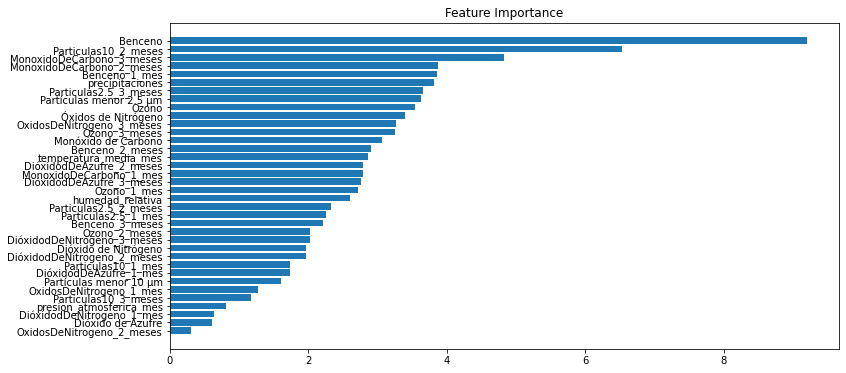

In [293]:
feature_importance = final_model_cb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [294]:
pred2_epoc=final_model_cb_epoc.predict(X_test)

In [295]:
mae_cb_epoc,rmse_cb_epoc,mape_cb_epoc=mean_absolute_error(pred2_epoc,y_test),np.sqrt(mean_squared_error(pred2_epoc,y_test)),mean_absolute_percentage_error(pred2_epoc,y_test)

In [296]:
errores_cb_epoc=[mae_cb_epoc,mape_cb_epoc,rmse_cb_epoc]

In [297]:
df_num_ingresos_epoc['predicciones_cb']=final_model_cb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/3182482037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para enfermedad pulmonar obstructiva cronica

In [298]:
model3=LGBMRegressor()

In [299]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [300]:
cv=RandomizedSearchCV(model3,param_grid,cv=4,n_jobs=-1)

In [301]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [302]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.4704610639029679)

In [303]:
final_model_lgb_epoc=LGBMRegressor(**cv.best_params_)
final_model_lgb_epoc.fit(X_train,y_train)

LGBMRegressor(max_depth=5, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

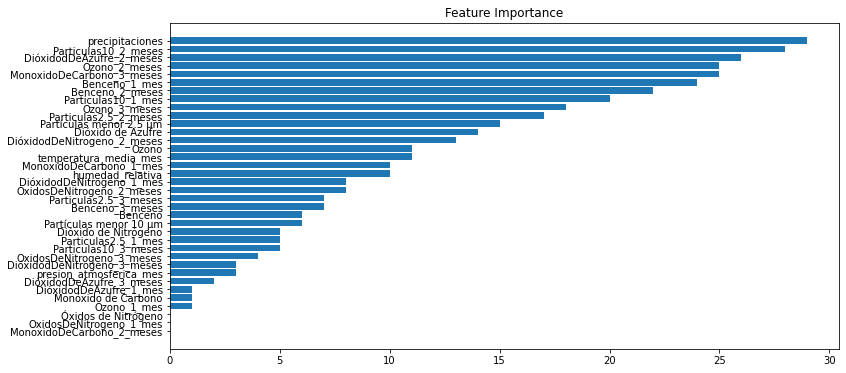

In [304]:
feature_importance = final_model_lgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [305]:
pred3_epoc=final_model_lgb_epoc.predict(X_test)

In [306]:
mae_lgb_epoc,rmse_lgb_epoc,mape_lgb_epoc=mean_absolute_error(pred3_epoc,y_test),np.sqrt(mean_squared_error(pred3_epoc,y_test)),mean_absolute_percentage_error(pred3_epoc,y_test)

In [307]:
errores_lgb_epoc=[mae_lgb_epoc,mape_lgb_epoc,rmse_lgb_epoc]

In [308]:
df_errores_epoc=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc,'errores_cb_epoc':errores_cb_epoc,'errores_lgb_epoc':errores_lgb_epoc},index=['MAE','MAPE','RMSE'])

In [309]:
df_errores_epoc

,errores_xgb_epoc,errores_cb_epoc,errores_lgb_epoc
MAE,43.936185,57.369258,56.562480
MAPE,0.137426,0.169415,0.190803
RMSE,72.180498,87.466570,69.975301


In [310]:
df_num_ingresos_epoc['predicciones_lgbm']=final_model_lgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/2543625712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
px.line(df_num_ingresos_epoc,x='fecha',y=['enfermedad pulmonar obstructiva cronica','predicciones_xgb',	'predicciones_cb',	'predicciones_lgbm'])

## XGBoost para neumonia bacteriana

In [313]:
columns_y='neumonia bacteriana'


X_train,X_test,y_train,y_test=train_test_split(df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_X],df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_y],test_size=0.2,random_state=42)

In [315]:
df_num_ingresos_nb=df_def_diagnosticos[['fecha','neumonia bacteriana']]

In [316]:
df_num_ingresos_nb.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/2118254318.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [317]:
model1=XGBRegressor(random_state=42, min_sample_split = 20)

In [318]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [319]:
cv=RandomizedSearchCV(model1,param_grid,cv=4,n_jobs=-1)

In [320]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[19:47:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None,
                                          min_sample_split=20, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_paralle

In [321]:
cv.best_params_,cv.best_score_

({'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.1},
 0.4154728212520596)

In [322]:
final_model_xgb_nb=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_nb.fit(X_train,y_train)

[19:47:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

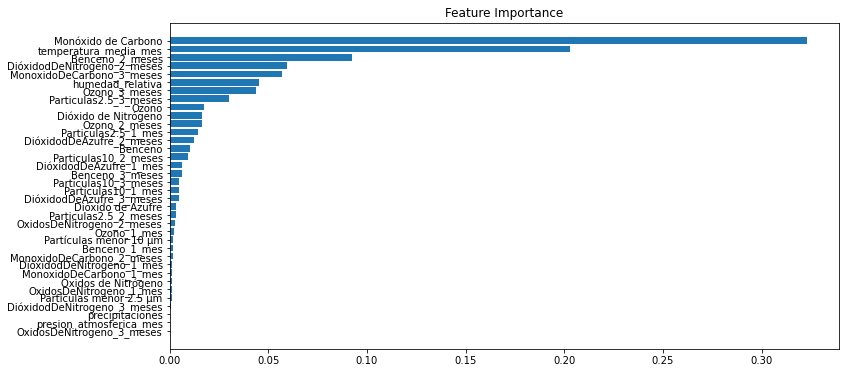

In [323]:
feature_importance = final_model_xgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [324]:
pred1_nb=final_model_xgb_nb.predict(X_test)

In [325]:
mae_xgb_nb,rmse_xgb_nb,mape_xgb_nb=mean_absolute_error(pred1_nb,y_test),np.sqrt(mean_squared_error(pred1_nb,y_test)),mean_absolute_percentage_error(pred1_nb,y_test)

In [326]:
errores_xgb_nb=[mae_xgb_nb,mape_xgb_nb,rmse_xgb_nb]

In [327]:
df_num_ingresos_nb['predicciones_xgb']=final_model_xgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/685724751.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para neumonia bacteriana

In [328]:
model2=CatBoostRegressor()

In [329]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [330]:
cv=RandomizedSearchCV(model2,param_grid,cv=4,n_jobs=-1)

In [331]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.33545802 -0.01950888  0.32539936  0.32056852  0.60783513  0.32539936
  0.33705414  0.36268592         nan  0.32666718]



0:	learn: 55.6738154	total: 3.35ms	remaining: 667ms
1:	learn: 53.0472063	total: 6.75ms	remaining: 668ms
2:	learn: 50.6465701	total: 10.5ms	remaining: 687ms
3:	learn: 48.8849823	total: 14.7ms	remaining: 721ms
4:	learn: 47.1049900	total: 18.9ms	remaining: 737ms
5:	learn: 45.2876957	total: 22.5ms	remaining: 729ms
6:	learn: 44.2562291	total: 25.5ms	remaining: 703ms
7:	learn: 42.8806123	total: 29.2ms	remaining: 700ms
8:	learn: 41.6033534	total: 33.3ms	remaining: 707ms
9:	learn: 39.8730221	total: 37.3ms	remaining: 709ms
10:	learn: 38.6518667	total: 40.8ms	remaining: 701ms
11:	learn: 37.3331891	total: 44.7ms	remaining: 701ms
12:	learn: 36.0473325	total: 47.9ms	remaining: 688ms
13:	learn: 35.0193251	total: 50.6ms	remaining: 672ms
14:	learn: 33.7387395	total: 53.7ms	remaining: 662ms
15:	learn: 32.5910439	total: 56.2ms	remaining: 646ms
16:	learn: 31.9680064	total: 58.6ms	remaining: 631ms
17:	learn: 30.8231104	total: 61.3ms	remaining: 620ms
18:	learn: 29.8920799	total: 64.7ms	remaining: 616ms
19:

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000025E88CB9370>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [332]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 0.6078351329775157)

In [333]:
final_model_cb_nb=CatBoostRegressor(**cv.best_params_)
final_model_cb_nb.fit(X_train,y_train)

0:	learn: 55.6738154	total: 10.6ms	remaining: 2.1s
1:	learn: 53.0472063	total: 18ms	remaining: 1.78s
2:	learn: 50.6465701	total: 24.2ms	remaining: 1.59s
3:	learn: 48.8849823	total: 29.5ms	remaining: 1.45s
4:	learn: 47.1049900	total: 38.2ms	remaining: 1.49s
5:	learn: 45.2876957	total: 45ms	remaining: 1.46s
6:	learn: 44.2562291	total: 51.8ms	remaining: 1.43s
7:	learn: 42.8806123	total: 57.5ms	remaining: 1.38s
8:	learn: 41.6033534	total: 68.3ms	remaining: 1.45s
9:	learn: 39.8730221	total: 73.7ms	remaining: 1.4s
10:	learn: 38.6518667	total: 79.7ms	remaining: 1.37s
11:	learn: 37.3331891	total: 86.4ms	remaining: 1.35s
12:	learn: 36.0473325	total: 92.1ms	remaining: 1.32s
13:	learn: 35.0193251	total: 99.1ms	remaining: 1.32s
14:	learn: 33.7387395	total: 103ms	remaining: 1.27s
15:	learn: 32.5910439	total: 107ms	remaining: 1.23s
16:	learn: 31.9680064	total: 117ms	remaining: 1.26s
17:	learn: 30.8231104	total: 125ms	remaining: 1.27s
18:	learn: 29.8920799	total: 131ms	remaining: 1.25s
19:	learn: 29.

Text(0.5, 1.0, 'Feature Importance')

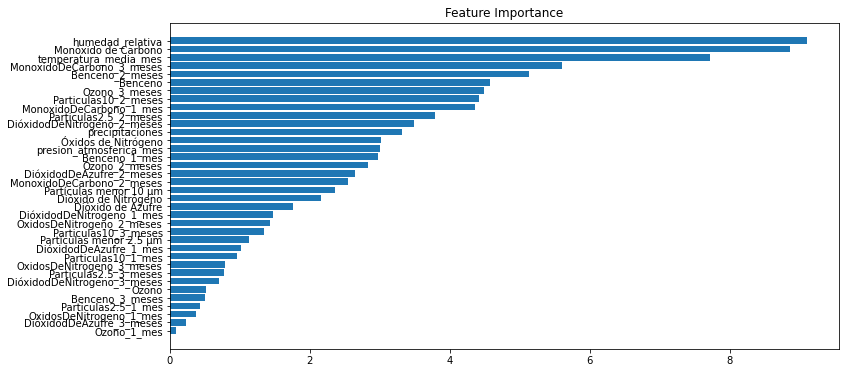

In [334]:
feature_importance = final_model_cb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [335]:
pred2_nb=final_model_cb_nb.predict(X_test)

In [336]:
mae_cb_nb,rmse_cb_nb,mape_cb_nb=mean_absolute_error(pred2_nb,y_test),np.sqrt(mean_squared_error(pred2_nb,y_test)),mean_absolute_percentage_error(pred2_nb,y_test)

In [337]:
errores_cb_nb=[mae_cb_nb,mape_cb_nb,rmse_cb_nb]

In [338]:
df_num_ingresos_nb['predicciones_cb']=final_model_cb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/481367817.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para neumonia bacteriana

In [339]:
model3=LGBMRegressor()

In [340]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [341]:
cv=RandomizedSearchCV(model3,param_grid,cv=4,n_jobs=-1)

In [342]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [343]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.3616704580407955)

In [344]:
final_model_lgb_nb=LGBMRegressor(**cv.best_params_)
final_model_lgb_nb.fit(X_train,y_train)

LGBMRegressor(max_depth=5, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

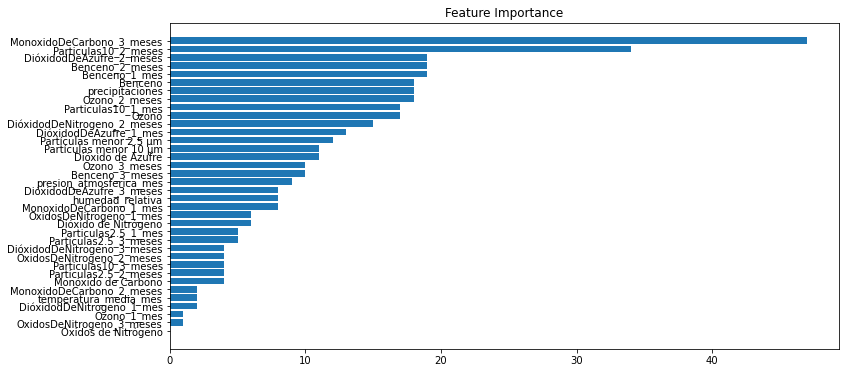

In [345]:
feature_importance = final_model_lgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [346]:
pred3_nb=final_model_lgb_nb.predict(X_test)

In [347]:
mae_lgb_nb,rmse_lgb_nb,mape_lgb_nb=mean_absolute_error(pred3_nb,y_test),np.sqrt(mean_squared_error(pred3_nb,y_test)),mean_absolute_percentage_error(pred3_nb,y_test)

In [348]:
errores_lgb_nb=[mae_lgb_nb,mape_lgb_nb,rmse_lgb_nb]

In [349]:
df_errores_nb=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb,'errores_cb_nb':errores_cb_nb,'errores_lgb_nb':errores_lgb_nb},index=['MAE','MAPE','RMSE'])

In [350]:
df_errores_nb

,errores_xgb_nb,errores_cb_nb,errores_lgb_nb
MAE,24.679087,23.815305,31.758986
MAPE,0.144471,0.131570,0.177071
RMSE,40.377017,41.237598,44.685398


In [351]:
df_num_ingresos_nb['predicciones_lgbm']=final_model_lgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/813005327.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
px.line(df_num_ingresos_nb,x='fecha',y=['neumonia bacteriana','predicciones_lgbm','predicciones_cb','predicciones_xgb'])

## XGBoost para asma

In [353]:
columns_y='asma'


X_train,X_test,y_train,y_test=train_test_split(df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_X],df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna())][columns_y],test_size=0.2,random_state=42)

In [354]:
df_num_ingresos_a=df_def_diagnosticos[['fecha','asma']]

In [355]:
df_num_ingresos_a.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/699617131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [356]:
model1=XGBRegressor(random_state=42, min_sample_split = 20)

In [357]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [358]:
cv=RandomizedSearchCV(model1,param_grid,cv=4,n_jobs=-1)

In [359]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[19:49:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None,
                                          min_sample_split=20, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_paralle

In [360]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01},
 0.39196566066703287)

In [361]:
final_model_xgb_a=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
final_model_xgb_a.fit(X_train,y_train)

[19:49:28] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

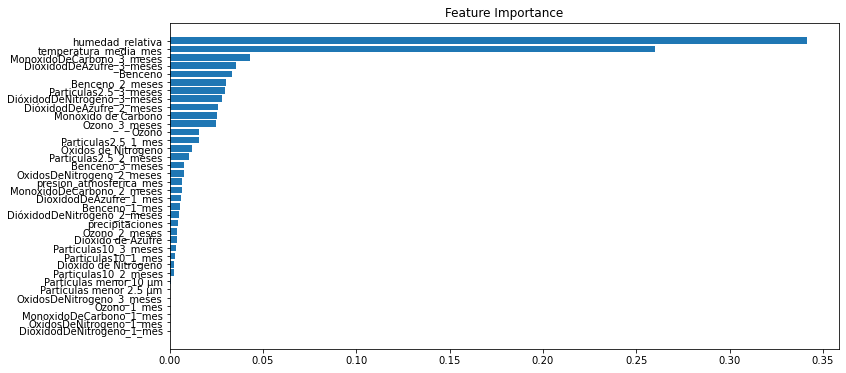

In [362]:
feature_importance = final_model_xgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [363]:
pred1_a=final_model_xgb_a.predict(X_test)

In [364]:
mae_xgb_a,rmse_xgb_a,mape_xgb_a=mean_absolute_error(pred1_a,y_test),np.sqrt(mean_squared_error(pred1_a,y_test)),mean_absolute_percentage_error(pred1_a,y_test)

In [365]:
errores_xgb_a=[mae_xgb_a,mape_xgb_a,rmse_xgb_a]

In [366]:
df_num_ingresos_a['predicciones_xgb']=final_model_xgb_a.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/3420313306.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost para asma

In [367]:
model2=CatBoostRegressor()

In [368]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [369]:
cv=RandomizedSearchCV(model2,param_grid,cv=4,n_jobs=-1)

In [370]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [0.21091632 0.03932264 0.58846967 0.47944919        nan 0.21103315
        nan        nan 0.50375601 0.32632625]



0:	learn: 38.7830657	total: 6.88ms	remaining: 1.37s
1:	learn: 37.2044174	total: 16.4ms	remaining: 1.62s
2:	learn: 35.5634002	total: 23.4ms	remaining: 1.54s
3:	learn: 34.2939712	total: 29.6ms	remaining: 1.45s
4:	learn: 33.0813498	total: 32.7ms	remaining: 1.27s
5:	learn: 31.7089091	total: 36ms	remaining: 1.16s
6:	learn: 30.9541359	total: 44ms	remaining: 1.21s
7:	learn: 29.7681305	total: 47.7ms	remaining: 1.14s
8:	learn: 28.8710426	total: 53.9ms	remaining: 1.14s
9:	learn: 28.0978811	total: 67.1ms	remaining: 1.27s
10:	learn: 27.5464728	total: 78.5ms	remaining: 1.35s
11:	learn: 26.4053454	total: 83.6ms	remaining: 1.31s
12:	learn: 25.5348058	total: 95.2ms	remaining: 1.37s
13:	learn: 24.7221209	total: 101ms	remaining: 1.34s
14:	learn: 23.8240478	total: 108ms	remaining: 1.33s
15:	learn: 23.0900304	total: 112ms	remaining: 1.28s
16:	learn: 22.3236222	total: 118ms	remaining: 1.27s
17:	learn: 21.5122835	total: 126ms	remaining: 1.28s
18:	learn: 20.7390780	total: 130ms	remaining: 1.24s
19:	learn: 19

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000025E85E3EAC0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [371]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 200, 'depth': 5}, 0.5884696739120939)

In [372]:
final_model_cb_a=CatBoostRegressor(**cv.best_params_)
final_model_cb_a.fit(X_train,y_train)

0:	learn: 38.7830657	total: 9ms	remaining: 1.79s
1:	learn: 37.2044174	total: 14.1ms	remaining: 1.39s
2:	learn: 35.5634002	total: 19.3ms	remaining: 1.27s
3:	learn: 34.2939712	total: 25.5ms	remaining: 1.25s
4:	learn: 33.0813498	total: 31.3ms	remaining: 1.22s
5:	learn: 31.7089091	total: 36.2ms	remaining: 1.17s
6:	learn: 30.9541359	total: 42.8ms	remaining: 1.18s
7:	learn: 29.7681305	total: 48ms	remaining: 1.15s
8:	learn: 28.8710426	total: 56.9ms	remaining: 1.21s
9:	learn: 28.0978811	total: 71.1ms	remaining: 1.35s
10:	learn: 27.5464728	total: 82.2ms	remaining: 1.41s
11:	learn: 26.4053454	total: 89.3ms	remaining: 1.4s
12:	learn: 25.5348058	total: 94.7ms	remaining: 1.36s
13:	learn: 24.7221209	total: 101ms	remaining: 1.34s
14:	learn: 23.8240478	total: 106ms	remaining: 1.31s
15:	learn: 23.0900304	total: 121ms	remaining: 1.39s
16:	learn: 22.3236222	total: 136ms	remaining: 1.46s
17:	learn: 21.5122835	total: 141ms	remaining: 1.43s
18:	learn: 20.7390780	total: 151ms	remaining: 1.44s
19:	learn: 19.9

Text(0.5, 1.0, 'Feature Importance')

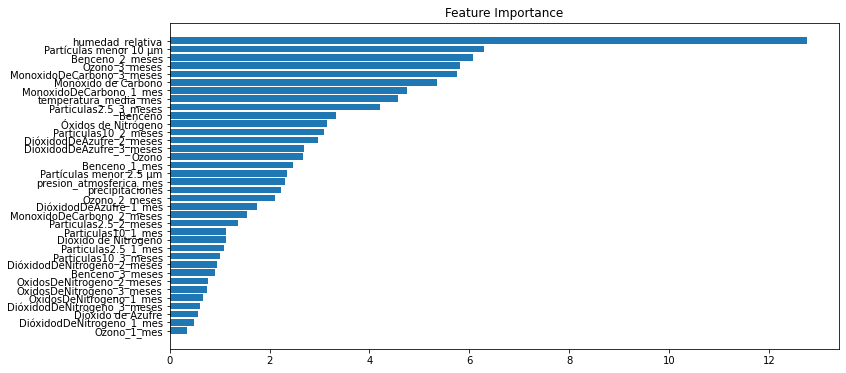

In [373]:
feature_importance = final_model_cb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [374]:
pred2_a=final_model_cb_a.predict(X_test)

In [375]:
mae_cb_a,rmse_cb_a,mape_cb_a=mean_absolute_error(pred2_a,y_test),np.sqrt(mean_squared_error(pred2_a,y_test)),mean_absolute_percentage_error(pred2_a,y_test)

In [376]:
errores_cb_a=[mae_cb_a,mape_cb_a,rmse_cb_a]

In [377]:
df_num_ingresos_a['predicciones_cb']=final_model_cb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/1054010735.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para asma

In [378]:
model3=LGBMRegressor()

In [379]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [380]:
cv=RandomizedSearchCV(model3,param_grid,cv=4,n_jobs=-1)

In [381]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [382]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 10, 'learning_rate': 0.1},
 0.45259102578113575)

In [383]:
final_model_lgb_a=LGBMRegressor(**cv.best_params_)
final_model_lgb_a.fit(X_train,y_train)

LGBMRegressor(max_depth=10, num_iterations=200)

Text(0.5, 1.0, 'Feature Importance')

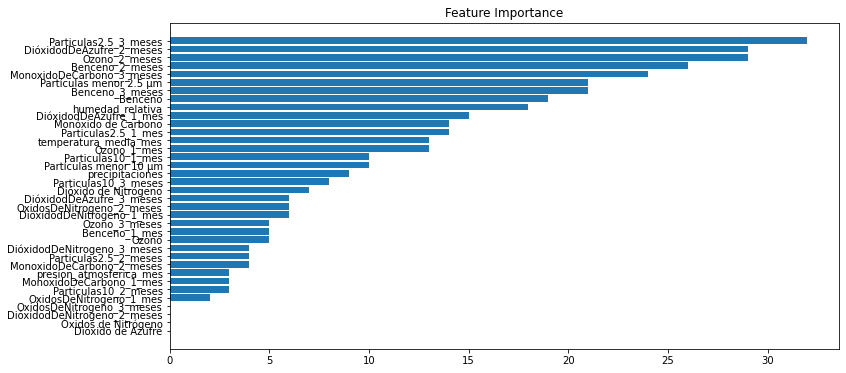

In [384]:
feature_importance = final_model_lgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [385]:
pred3_a=final_model_lgb_a.predict(X_test)

In [386]:
mae_lgb_a,rmse_lgb_a,mape_lgb_a=mean_absolute_error(pred3_a,y_test),np.sqrt(mean_squared_error(pred3_a,y_test)),mean_absolute_percentage_error(pred3_a,y_test)

In [387]:
errores_lgb_a=[mae_lgb_a,mape_lgb_a,rmse_lgb_a]

In [388]:
df_errores_a=pd.DataFrame({'errores_xgb_a':errores_xgb_a,'errores_cb_a':errores_cb_a,'errores_lgb_a':errores_lgb_a},index=['MAE','MAPE','RMSE'])

In [389]:
df_errores_a

,errores_xgb_a,errores_cb_a,errores_lgb_a
MAE,23.807755,20.159035,23.459777
MAPE,0.287828,0.195180,0.232332
RMSE,27.748780,28.631222,30.106809


In [390]:
df_num_ingresos_a['predicciones_lgbm']=final_model_lgb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_26136/3624501283.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [391]:
px.line(df_num_ingresos_a,x='fecha',y=['asma','predicciones_lgbm','predicciones_cb','predicciones_xgb'])